In [ ]:
#Description : This is a sentiment analysis program that parses the tweets fecthed from Twitter using Python 

In [ ]:
#Import the libraries 
import tweepy 
from textblob import TextBlob 
from wordcloud import WordCloud 
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data 
from google.colab import files
uploaded=files.upload()

Saving Twitter API Login1.xlsx to Twitter API Login1.xlsx


In [ ]:
#Get the data
log=pd.read_excel('Twitter API Login1.xlsx')
log

In [ ]:
#Twitter API Credentials
apiKey=log['key'][0]
apiKeySecret=log['key'][1]
accessToken=log['key'][3]
accessTokenKey=log['key'][4]

In [ ]:
from tweepy import api
#Create the autentication key
autenticate=tweepy.OAuthHandler(apiKey, apiKeySecret)

#Set the access token and access token secret
autenticate.set_access_token(accessToken, accessTokenKey)

#Create the API object while passing in the auth information 
api=tweepy.API(autenticate, wait_on_rate_limit=True)

In [ ]:
#Extract 100 tweets from the twitter user
posts=api.user_timeline(screen_name='BillGates', count=100, lang='en', tweet_mode='extended')

#Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i)+ ') ' + tweet.full_text + '\n')

Show the 5 recent tweets: 

1) It has been over a year since wild polio paralyzed a child in Pakistan, presenting an incredible opportunity to stop this disease for good. I traveled to Pakistan to learn from their polio program leaders. https://t.co/OgEiuD5bFj

1) Thank you @ImranKhanPTI for the productive discussions on the steps being taken in Pakistan to eliminate polio. I’m encouraged by the country’s commitment to eradication and am optimistic that if everyone remains vigilant, we can #endpolio. https://t.co/cMAw3ZfDxr

1) I’m hopeful that the world can come together to end this pandemic and prevent the next one. Thanks Dax Shepard, Monica Padman, and @davidfarrier for the great conversation. https://t.co/24IHu2YHxq

1) The goal of no more pandemics ever is ambitious, but the progress we’ve made over the last two years has already set us on a path to success: https://t.co/mmeGMNrTZs https://t.co/3KsRhEZhNh

1) I’m more optimistic than ever that we can one day stop Alzheimer’s beca

In [ ]:
#Create a dataframe with a column called Tweets 
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,It has been over a year since wild polio paral...
1,Thank you @ImranKhanPTI for the productive dis...
2,I’m hopeful that the world can come together t...
3,The goal of no more pandemics ever is ambitiou...
4,I’m more optimistic than ever that we can one ...


In [ ]:
#Clean the text

#Create a funtion to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+' , '', text) #Remove @mentions
  text=re.sub(r'#', '', text) #Removing the '#' symbol
  text=re.sub(r'RT[\s]+', '', text) #Removing RT
  text=re.sub(r'https?:\/\/\S+', '', text) #Removing the hyper link

  return text

#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df
  

,Tweets
0,It has been over a year since wild polio paral...
1,Thank you for the productive discussions on t...
2,I’m hopeful that the world can come together t...
3,The goal of no more pandemics ever is ambitiou...
4,I’m more optimistic than ever that we can one ...
...,...
95,Nobody can be an expert in all things at once....
96,I recently had the chance to meet 36 incredibl...
97,To tackle the biggest global health challenges...
98,I recently met with 36 remarkable graduate stu...


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,It has been over a year since wild polio paral...,0.633333,0.566667
1,Thank you for the productive discussions on t...,0.000000,0.000000
2,I’m hopeful that the world can come together t...,0.316667,0.333333
3,The goal of no more pandemics ever is ambitiou...,0.329167,0.075000
4,I’m more optimistic than ever that we can one ...,0.500000,0.500000
...,...,...,...
95,Nobody can be an expert in all things at once....,0.000000,0.000000
96,I recently had the chance to meet 36 incredibl...,0.716667,0.466667
97,To tackle the biggest global health challenges...,0.243750,-0.031250
98,I recently met with 36 remarkable graduate stu...,0.500000,0.416667


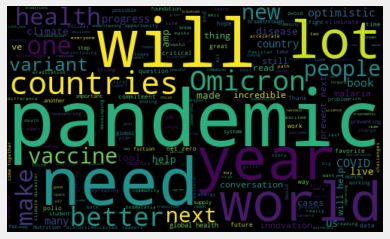

In [ ]:
#Plot the Word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral, and postive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Postive'

df['Analysis']=df['Polarity'].apply(getAnalysis)


#Show the dataframe
df



,Tweets,Subjectivity,Polarity,Analysis
0,It has been over a year since wild polio paral...,0.633333,0.566667,Postive
1,Thank you for the productive discussions on t...,0.000000,0.000000,Neutral
2,I’m hopeful that the world can come together t...,0.316667,0.333333,Postive
3,The goal of no more pandemics ever is ambitiou...,0.329167,0.075000,Postive
4,I’m more optimistic than ever that we can one ...,0.500000,0.500000,Postive
...,...,...,...,...
95,Nobody can be an expert in all things at once....,0.000000,0.000000,Neutral
96,I recently had the chance to meet 36 incredibl...,0.716667,0.466667,Postive
97,To tackle the biggest global health challenges...,0.243750,-0.031250,Negative
98,I recently met with 36 remarkable graduate stu...,0.500000,0.416667,Postive


In [ ]:
#Print all of the postive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j=j+1


In [ ]:
#Print all of the postive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j=j+1

1)One person’s act of bravery can spark dramatic change in hundreds of lives. ’s story is a powerful example. 

2)I wholeheartedly agree with Larry's view that all companies need to be actively preparing for their net zero transition - shareholders, employees, customers, communities, and regulators expect it. 

3)The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why  is joining  to renew our investment in . 

4)ICYMI here’s a recap of my conversation with . We chatted about this pandemic, how to prevent the next one, and a few things in between. 

5):     So tough question: where do you think SARS-CoV-2 came from? What data do you want to see? An…

6)    People like you and I and Tony Fauci have been subject to a lot of misinformation. I didn't expect that. Some of it like me putting chips in arms doesn't make sense to me - why would I want to do that?

7):   One major problem has been onli

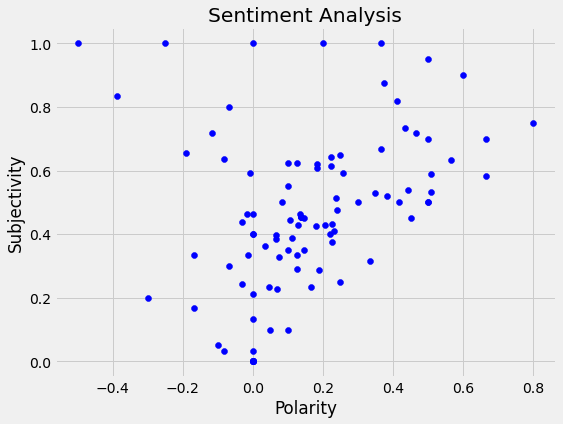

In [ ]:
#Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Get the percentage of postive tweets
ptweets=df[df.Analysis=='Postive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0]*100/1))

66

In [ ]:
#Get the percentage of negative tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0]*100/1))

18

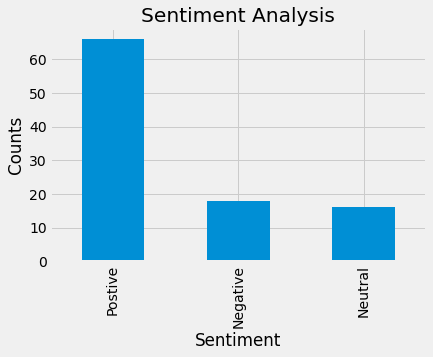

In [ ]:
#Show the value counts 

df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()